<a href="https://colab.research.google.com/github/YunfeiZhai703/IIA/blob/main/3F8_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the auxiliary code for the 3F8 coursework. Some parts are missing and should be completed by the student. These are Marked with XXX

**Note that your changes will not be saved unless you click the "Copy to Drive" button above!**

In [74]:
# First we download the data

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY' -O X.txt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=15HONyJXWARLhNAtNQXFWAH8pvGPahh_U' -O y.txt

--2023-02-24 12:46:31--  https://docs.google.com/uc?export=download&id=1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY
Resolving docs.google.com (docs.google.com)... 142.251.162.100, 142.251.162.113, 142.251.162.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.162.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4fn4gbuamgnb4g3kutgscpjrah4icsct/1677242775000/03911252296720181638/*/1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY?e=download&uuid=1d3c7ba8-30f4-461f-8982-c2ef21c59288 [following]
--2023-02-24 12:46:31--  https://doc-0c-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4fn4gbuamgnb4g3kutgscpjrah4icsct/1677242775000/03911252296720181638/*/1UJVoJqzHc7DZC8YDCN8e15LA6DvEnsuY?e=download&uuid=1d3c7ba8-30f4-461f-8982-c2ef21c59288
Resolving doc-0c-88-docs.googleusercontent.com (doc-0c-88-docs.googleusercontent.com)... 74.125.134.132, 2607:f

In [75]:
# We load the data

import numpy as np

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

print(X)

[[ 0.10746656 -2.09972864]
 [-0.36266123  0.08748024]
 [ 0.50836641 -0.91481261]
 ...
 [-0.06218427 -1.20693987]
 [-0.49621223 -0.91333698]
 [ 1.29297988  0.20475934]]


In [76]:
# We plot the data

import matplotlib.pyplot as plt

##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.show()

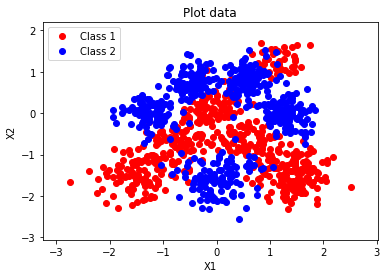

In [77]:
plot_data(X, y)

In [78]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

In [79]:
# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))

##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))

##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# y: vector of binary output labels 
# w: vector of model parameters
#
# Output: The average loglikelihood
#

def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#

def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)

In [82]:
##
# Function that finds the model parameters by optimising the likelihood using gradient descent
#
# Input:
#
# X_tile_train: matrix of training input features (with a constant 1 appended to the left) 
# y_train: vector of training binary output labels 
# X_tile_test: matrix of test input features (with a constant 1 appended to the left) 
# y_test: vector of test binary output labels 
# alpha: step_size_parameter for the gradient based optimisation
# n_steps: the number of steps of gradient based optimisation
#
# Output: 
# 
# 1 - Vector of model parameters w 
# 2 - Vector with average log-likelihood values obtained on the training set
# 3 - Vector with average log-likelihood values obtained on the test set
#
def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)
        gradientLog = np.dot((y_train-sigmoid_value),X_tilde_train)
        w = w + alpha*gradientLog# XXX Gradient-based update rule for w. To be completed by the student

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)
        print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test

In [83]:
# We train the classifier

alpha = 0.001# XXX Learning rate for gradient-based optimisation. To be completed by the student
n_steps = 100# XXX Number of steps of gradient-based optimisation. To be completed by the student

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-0.6761393015007345 -0.6631167501348482
-0.6606205485695742 -0.6565265617444964
-0.6497828197200834 -0.652758781417123
-0.6420836506819834 -0.6506443246460936
-0.636507057747009 -0.6494819943874259
-0.6323897140796882 -0.6488612552369618
-0.6292958395680462 -0.648544819509832
-0.6269349150629772 -0.6483966684970719
-0.6251095505900325 -0.6483394607919369
-0.6236828152971898 -0.6483296949274546
-0.6225577002108639 -0.6483432965428
-0.6216640699439743 -0.6483672659026789
-0.6209502492152597 -0.6483948435698328
-0.620377504603418 -0.6484227218877203
-0.61991635834566 -0.6484494482122856
-0.6195440788002332 -0.6484745223383284
-0.6192429388624906 -0.6484978969687926
-0.6189989840635154 -0.6485197103542599
-0.6188011448326806 -0.6485401507933051
-0.6186405852897693 -0.6485593943102167
-0.6185102175179179 -0.6485775814636067
-0.6184043336926952 -0.6485948138254721
-0.61831832363581 -0.6486111592747165
-0.6182484553463177 -0.6486266602816069
-0.618191702711733 -0.6486413422585797
-0.618145609

In [84]:
##
# Function that plots the average log-likelihood returned by "fit_w"
#
# Input:
#
# ll: vector with log-likelihood values
#
# Output: Nothing
#

def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.show()


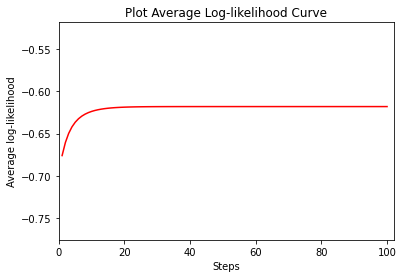

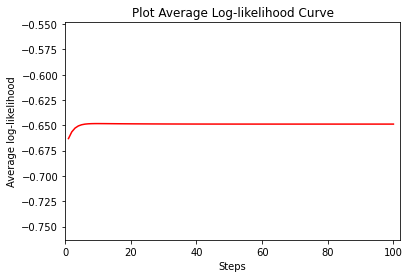

In [85]:
# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

In [86]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, w, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

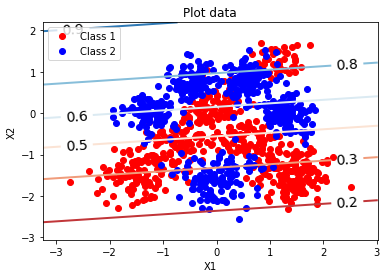

In [88]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w)

In [103]:
##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

In [104]:
# We expand the data

l = 1 # XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

In [111]:
# We train the new classifier on the feature expanded inputs

alpha = 0.0001# XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student
n_steps = 500# XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-1.4600429894179785 -1.817028257973133
-1.222153722556327 -1.5107876779136098
-1.0421152593169518 -1.2780661385952516
-0.904407280957988 -1.0989038221991934
-0.7979809644801874 -0.9583185358079259
-0.7160181700274196 -0.84755087943397
-0.6539147919972208 -0.7613813330564548
-0.6077950050709822 -0.6956247489807749
-0.5740344787624544 -0.6461769107330102
-0.5493747139163268 -0.6091508285617474
-0.5311306710280017 -0.5812322861677828
-0.5172664240357943 -0.5598374283058094
-0.5063372320782551 -0.5430702354124349
-0.4973678580335596 -0.5295901767925814
-0.4897238246038308 -0.5184688628959426
-0.483002914228034 -0.5090690699342267
-0.476954022714975 -0.5009534602713503
-0.4714208993829925 -0.4938197805296703
-0.46630519092379785 -0.48745648930391766
-0.46154314715247785 -0.48171301343824297
-0.4570914127421905 -0.47648002358684366
-0.4529185893832645 -0.4716763885339424
-0.44900033346753093 -0.4672405154597115
-0.44531655853149377 -0.46312455471244107
-0.44184986146346583 -0.459290479097704

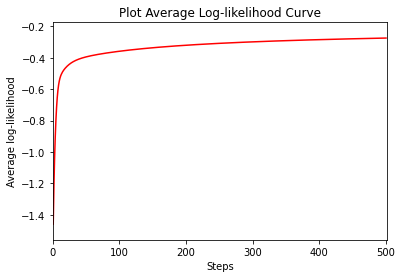

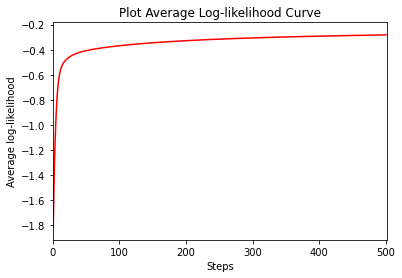

In [112]:
# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

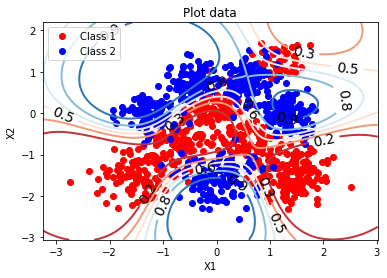

In [113]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))